In [1]:
import pandas as pd
import praw

## Data Collection

In [1]:
reddit = praw.Reddit(client_id='l6CMr4BIhb71aA',
                     client_secret='4uUiJ_PB5euowT_guZodGwt0wP4',
                     user_agent='chrome:com.coviddata:v1.0.0 (by u/q3oli)')

In [2]:
submissions = list()

In [3]:
for submission in reddit.subreddit('all').search('Covid', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('Corona', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('Coronavirus', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('Virus', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('Chinese', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('China', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('Wuhan', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('NYC', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('New York', limit=1000):
    submissions.append(submission)
for submission in reddit.subreddit('all').search('CDC', limit=1000):
    submissions.append(submission)

## Data Cleaning

In [4]:
sub_id = list() 
author = list()
subreddit = list()
title = list()
selftext = list()
score = list()
num_comments = list()
created_utc = list()


for submission in submissions:
    sub_id.append(submission.id)
    author.append(submission.author)
    subreddit.append(submission.subreddit)
    title.append(submission.title)
    selftext.append(submission.selftext)
    score.append(submission.score)
    num_comments.append(submission.num_comments)
    created_utc.append(submission.created_utc)



In [5]:
subDict = {
    "id": sub_id,
    "author": author,
    "subreddit": subreddit,
    "title": title,
    "selftext": selftext,
    "score": score,
    "num_comments": num_comments,
    "created_utc": created_utc
}
df = pd.DataFrame.from_dict(subDict)

In [6]:
len(df)

2465

In [7]:
com_id = list() 
com_parent_id = list()
com_author = list()
com_subreddit = list()
com_body = list()
com_score = list()
com_created_utc = list()

def addToList(c):
    com_id.append(c.id)
    com_parent_id.append(c.parent_id)
    com_author.append(c.author)
    com_subreddit.append(c.subreddit)
    com_body.append(c.body)
    com_score.append(c.score)
    com_created_utc.append(c.created_utc)

for submission in submissions:
    for comment in submission.comments:
        try:
            if comment.body.lower().find("covid") >= 0:
                addToList(comment)
            elif comment.body.lower().find("corona") >= 0:
                addToList(comment)
            elif comment.body.lower().find("coronavirus") >= 0:
                addToList(comment)
            elif comment.body.lower().find("virus") >= 0:
                addToList(comment)
            elif comment.body.lower().find("chinese") >= 0:
                addToList(comment)
            elif comment.body.lower().find("china") >= 0:
                addToList(comment)
            elif comment.body.lower().find("wuhan") >= 0:
                addToList(comment)
            elif comment.body.lower().find("nyc") >= 0:
                addToList(comment)
            elif comment.body.lower().find("new york") >= 0:
                addToList(comment)
            elif comment.body.lower().find("cdc") >= 0:
                addToList(comment)
        except:
            continue

In [8]:
print(len(com_id))

26230


In [9]:
comDict = {
    "id": com_id,
    "parent_id": com_parent_id,
    "author": com_author,
    "subreddit": com_subreddit,
    "body": com_body,
    "score": com_score,
    "created_utc": com_created_utc
}
com_df = pd.DataFrame.from_dict(comDict)

In [62]:
com_df.head()

,body
0,Astronomer here! Just wanted to post about thi...
1,This is happening all over science right now. ...
2,COVID has shown me more than anything else tha...
3,This story isnâ€™t helping me with that theory...
4,"Yes, the mishandling of Covid 19, especially a..."


In [11]:
df.to_csv(r'C:\Users\A02064884\Documents\Quinton - School\Data Science Incubator\Final Project\Reddit_Submissions2.csv', index = False, header = True)
com_df.to_csv(r'C:\Users\A02064884\Documents\Quinton - School\Data Science Incubator\Final Project\Reddit_Comments2.csv', index = False, header = True)

In [3]:
com_df = pd.read_csv("Reddit_Comments.csv", engine='python');
sub_df = pd.read_csv("Reddit_Submissions.csv", engine='python');

sub_df = sub_df.drop_duplicates(subset="id")
com_df = com_df.drop_duplicates(subset="id")

In [54]:
sub_titles = sub_df.drop(columns=['id','author','subreddit','selftext','score','num_comments','created_utc'])
sub_selftext = sub_df.drop(columns=['id','author','subreddit','title','score','num_comments','created_utc'])
com_body = com_df.drop(columns=['id','parent_id','author','subreddit','score','created_utc'])

In [58]:
import re
# Remove punctuation
com_body['body_processed'] = com_body['body'].map(lambda x: re.sub('[,\.!?]|https', '', x))
# Convert the titles to lowercase
com_body['body_processed'] = com_body['body_processed'].map(lambda x: x.lower())
# Print out the first rows of comments
display(com_body['body_processed'].head())

0    astronomer here just wanted to post about this...
1    this is happening all over science right now p...
2    covid has shown me more than anything else tha...
3    this story isnâ€™t helping me with that theory...
4    yes the mishandling of covid 19 especially as ...
Name: body_processed, dtype: object

## Analysis

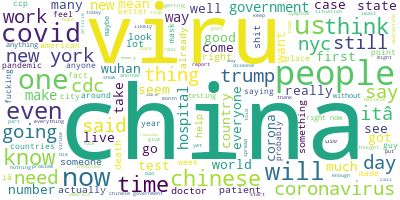

In [226]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(com_body['body_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

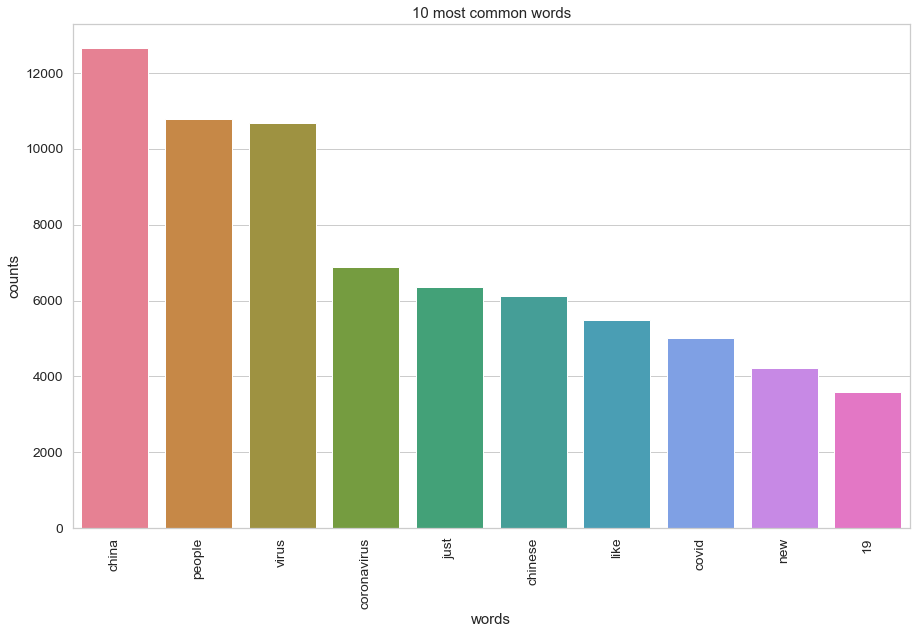

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    return count_dict
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(com_body['body_processed'])
# Visualise the 10 most common words
count_dict = plot_10_most_common_words(count_data, count_vectorizer)

In [60]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
china chinese virus people government just world trump like wuhan

Topic #1:
virus people like just new really york know going think

Topic #2:
people covid just cdc work 19 masks like home going

Topic #3:
coronavirus comments http wwwredditcom watchv wwwyoutubecom questions message bot subreddit

Topic #4:
coronavirus cases 19 covid 2020 new news deaths wuhan health


In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [222]:
def select_sentiment(value):
    if value >= 0.05:
        return 1
    elif value > -0.05 :
        return 0
    else:
        return -1

In [181]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [193]:
covid_s = dict() 
coronavirus_s = dict()
corona_s = dict()
virus_s = dict()
chinese_s = dict()
china_s = dict()
wuhan_s = dict()
nyc_s = dict()
new_york_s = dict()
cdc_s = dict()
trump_s = dict()

for text in com_body['body_processed']:
    try:     
        if text.find("covid") >= 0:
            covid_s[text] = sentiment_analyzer_scores(text)
        if text.find("coronavirus") >= 0:
            coronavirus_s[text] = sentiment_analyzer_scores(text)
        if text.find("corona ") >= 0:
            corona_s[text] = sentiment_analyzer_scores(text)
        if text.find("virus") >= 0:
            virus_s[text] = sentiment_analyzer_scores(text)
        if text.find("chinese") >= 0:
            chinese_s[text] = sentiment_analyzer_scores(text)
        if text.find("china") >= 0:
            china_s[text] = sentiment_analyzer_scores(text)
        if text.find("wuhan") >= 0:
            wuhan_s[text] = sentiment_analyzer_scores(text)
        if text.find("nyc") >= 0:
            nyc_s[text] = sentiment_analyzer_scores(text)
        if text.find("new york") >= 0:
            new_york_s[text] = sentiment_analyzer_scores(text)
        if text.find("cdc") >= 0:
            cdc_s[text] = sentiment_analyzer_scores(text)
        if text.find("trump") >= 0:
            trump_s[text] = sentiment_analyzer_scores(text)
    except:
        continue
    

In [194]:
term_dicts = [(covid_s, "covid"), (coronavirus_s, "coronavirus"),
              (corona_s, "corona"), (virus_s, "virus"), (chinese_s, "chinese"), 
              (china_s, "china"), (wuhan_s, "wuhan"), (nyc_s, "nyc"),
              (new_york_s, "new york"), (cdc_s, "cdc"), (trump_s, "trump")]

In [139]:
import matplotlib.pyplot as plt

Term: " covid "
Sample Size:  4475


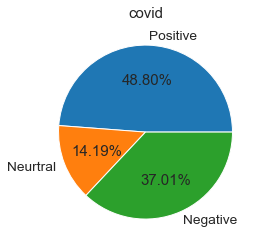

----------------------------------------------------------------------------------------
Term: " coronavirus "
Sample Size:  4630


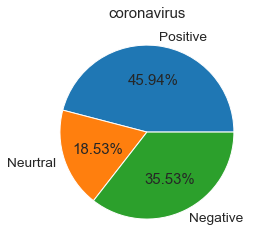

----------------------------------------------------------------------------------------
Term: " corona "
Sample Size:  1412


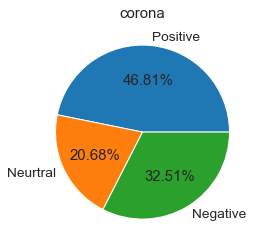

----------------------------------------------------------------------------------------
Term: " virus "
Sample Size:  12771


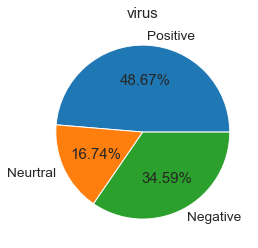

----------------------------------------------------------------------------------------
Term: " chinese "
Sample Size:  4443


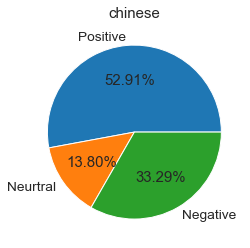

----------------------------------------------------------------------------------------
Term: " china "
Sample Size:  8949


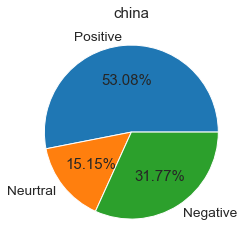

----------------------------------------------------------------------------------------
Term: " wuhan "
Sample Size:  1910


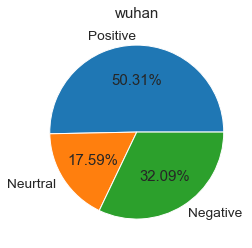

----------------------------------------------------------------------------------------
Term: " nyc "
Sample Size:  2014


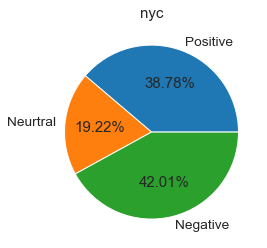

----------------------------------------------------------------------------------------
Term: " new york "
Sample Size:  1776


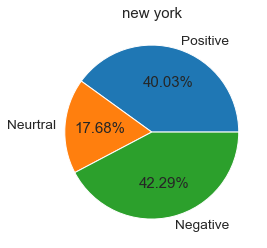

----------------------------------------------------------------------------------------
Term: " cdc "
Sample Size:  2113


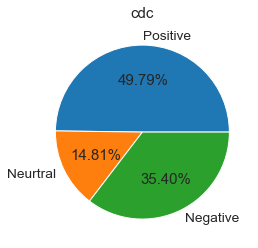

----------------------------------------------------------------------------------------
Term: " trump "
Sample Size:  2107


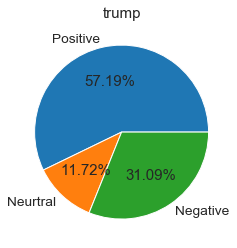

----------------------------------------------------------------------------------------


In [223]:
labels = ["Positive", "Neurtral", "Negative"]

for dictionary in term_dicts:
    print('Term: "', dictionary[1], '"')
    print('Sample Size: ', len(dictionary[0]))
    neg = 0
    neu = 0
    pos = 0
    compound = 0
    for key in dictionary[0]:
        result = select_sentiment(dictionary[0][key]['compound'])
        if result == -1:
            neg += 1
        if result == 0:
            neu += 1
        if result == 1:
            pos += 1

    fractions = [(neg/len(dictionary[0]))*100, (neu/len(dictionary[0]))*100, (pos/len(dictionary[0]))*100]
    plt.pie(fractions, labels=labels, autopct='%1.2f%%')
    plt.title(dictionary[1])
    plt.show()
    print("----------------------------------------------------------------------------------------")
    